In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Data Summarization

In [2]:
df =pd.read_csv('usa_covid_dataset.csv')
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [3]:
df.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,56.000000,56.000000,58.000000,58.000000,42.000000,58.000000,58.000000,56.000000,5.600000e+01,33.000000,57.000000,5.800000e+01,56.000000,33.000000
mean,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,3894.186870,14.342541
std,10.887035,49.754449,52562.031122,4084.750891,11674.490020,41294.705318,17408.350591,402.682539,2.987834e+05,13185.628145,2.135002,2.378302e+07,1933.169297,5.047403
min,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,97.702058,6.778043
25%,34.594600,-101.165775,2596.000000,74.000000,970.000000,812.500000,18.250000,148.521021,4.608100e+04,535.000000,3.072626,8.400001e+07,2712.800274,10.000000
50%,39.061850,-87.944200,10148.500000,385.000000,3008.000000,5644.500000,32.500000,250.477287,1.386545e+05,1493.000000,4.403318,8.400003e+07,3469.782532,13.598326
75%,42.361650,-76.970625,29395.500000,1394.250000,7326.750000,19291.250000,47.750000,477.888542,2.796948e+05,4389.000000,5.466238,8.400004e+07,4763.649736,17.658649
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,11377.424693,28.054438


    1. Wide gap occurs in all columns between 75% and max. Hence outliers are present.
    2. Mean > Median in almost all the columns, hence right skewed data.
    3. We can see that minimum value of Confirmed is 0, that means there are some rows with no information regarding 
    covid cases, hence we need to drop them.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

   1. There are null values present in most of the columns.
   2. Columns [ Province_State, Country_Region, Last_Update and IS03 ] are object type, needs to be encoded.

In [5]:
df.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

# Data Visualization and Manipulation

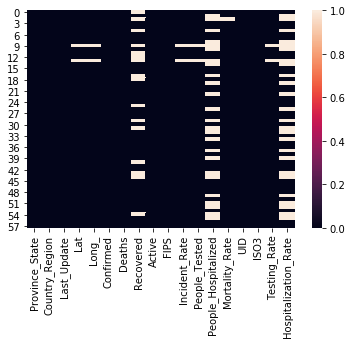

In [6]:
sns.heatmap(df.isnull())

Text(0.5, 1.0, 'Mortality Rate Distribution')

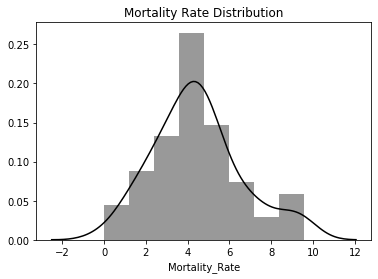

In [7]:
sns.distplot(df['Mortality_Rate'],color='Black')
plt.title("Mortality Rate Distribution")

Text(0.5, 1.0, 'Incidet Rate Distribution')

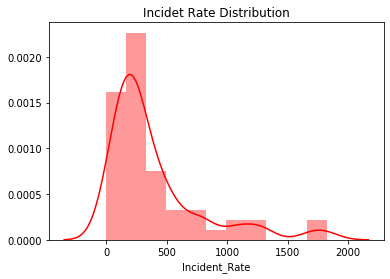

In [8]:
sns.distplot(df['Incident_Rate'],color='Red')
plt.title("Incidet Rate Distribution")

Text(0.5, 1.0, 'Testing Rate Distribution')

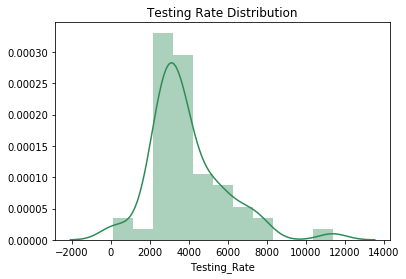

In [9]:
sns.distplot(df['Testing_Rate'],color='Seagreen')
plt.title("Testing Rate Distribution")

Text(0.5, 1.0, 'Hospitalization Rate Distribution')

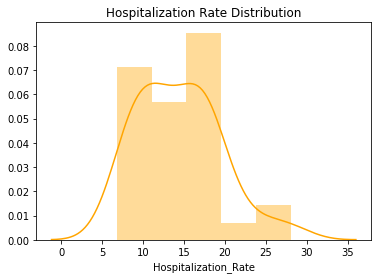

In [10]:
sns.distplot(df['Hospitalization_Rate'],color='Orange')
plt.title("Hospitalization Rate Distribution")

Text(0.5, 1.0, 'Highest Number of Cases confirmed in states of USA')

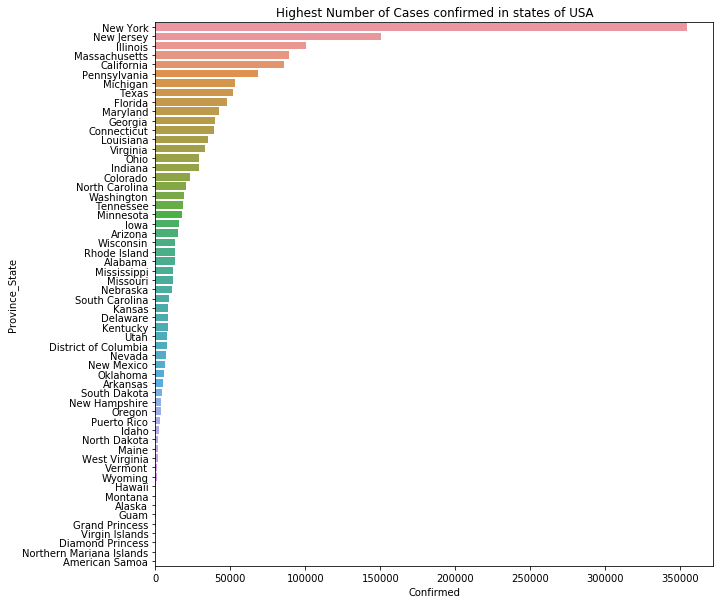

In [11]:
#How many confirmed cases are present in USA :
plt.figure(figsize=(10,10))
confirmed_cases=df[['Confirmed','Province_State']]
confirmed_cases.sort_values('Confirmed',ascending=False,inplace=True)
sns.barplot(x='Confirmed',y='Province_State',data=confirmed_cases)
plt.title("Highest Number of Cases confirmed in states of USA")

     We can see that maximum number of cases have occurred in eastern states of USA  - New York, New Jersey,Illinois and
     so on.
     We can see that less populated states,especially islands are less affected from COVID-19.

Text(0.5, 1.0, 'Highest Number of Cases confirmed in states of USA')

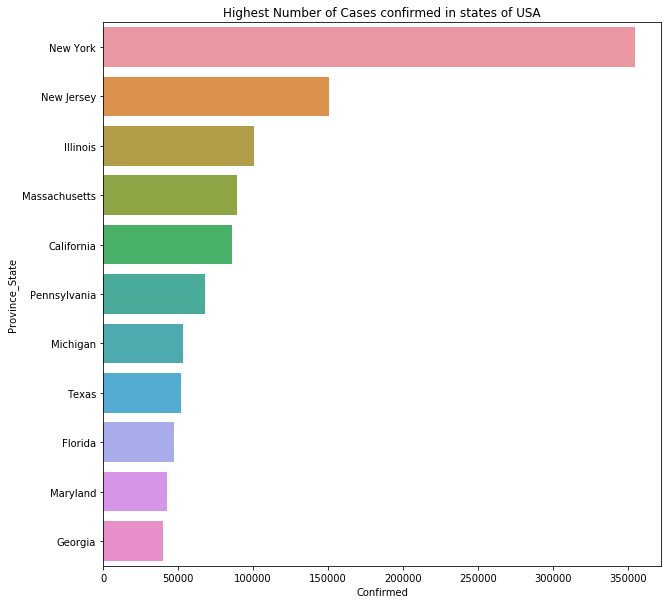

In [12]:
#Top 10 states that has maximum confirmed cases  in USA :
plt.figure(figsize=(10,10))
confirmed_cases=df[['Confirmed','Province_State']]
confirmed_cases.sort_values('Confirmed',ascending=False,inplace=True)
sns.barplot(x='Confirmed',y='Province_State',data=confirmed_cases[:11])
plt.title("Highest Number of Cases confirmed in states of USA")

Text(0.5, 1.0, 'Highest Number of Deaths in states of USA')

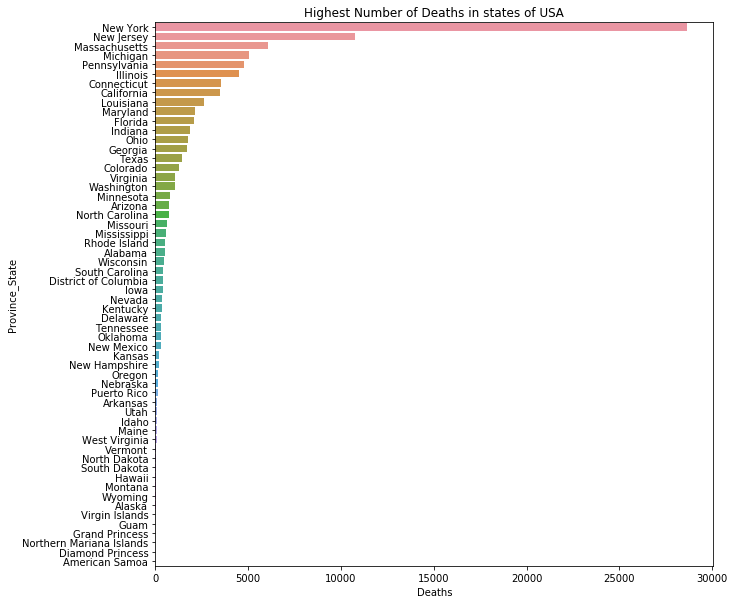

In [13]:
#How many death cases are present in USA :
plt.figure(figsize=(10,10))
confirmed_cases=df[['Deaths','Province_State']]
confirmed_cases.sort_values('Deaths',ascending=False,inplace=True)
sns.barplot(x='Deaths',y='Province_State',data=confirmed_cases)
plt.title("Highest Number of Deaths in states of USA")

    Maximum people have died due to COVID-19 in New York.

Text(0.5, 1.0, 'Highest Number of Deaths in states of USA')

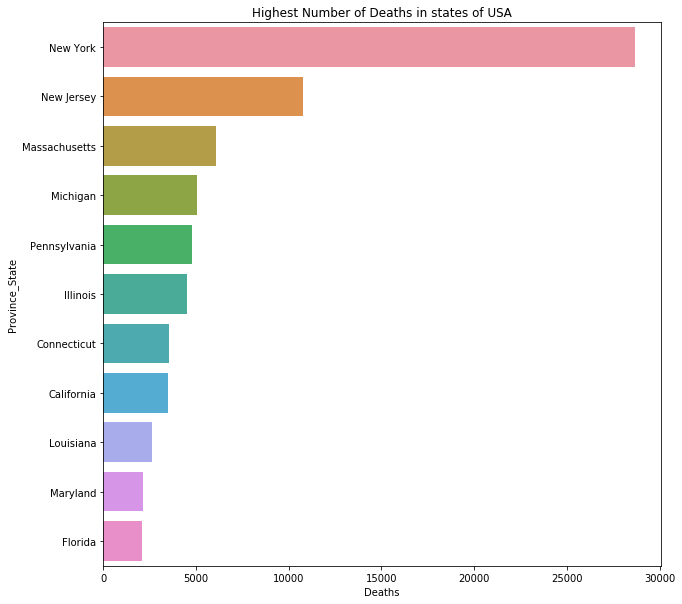

In [14]:
from numpy import median
#Top 10 states with max death cases in USA :
plt.figure(figsize=(10,10))
confirmed_cases=df[['Deaths','Province_State']]
confirmed_cases.sort_values('Deaths',ascending=False,inplace=True)
sns.barplot(x='Deaths',y='Province_State',data=confirmed_cases[:11])
plt.title("Highest Number of Deaths in states of USA")

Text(0.5, 1.0, 'Cases Status')

<Figure size 1800x1800 with 0 Axes>

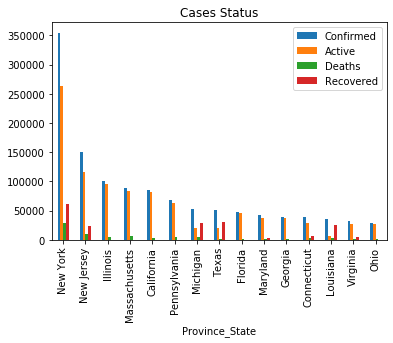

In [15]:
plt.figure(figsize=(25,25))
df_new = df[['Province_State','Confirmed','Active','Deaths','Recovered']].sort_values('Confirmed',ascending=False)
df_new[:15].plot(x='Province_State',kind='bar')
plt.title("Cases Status")

Text(0.5, 1.0, 'Testing Rate vs Incident Rate')

<Figure size 1800x1800 with 0 Axes>

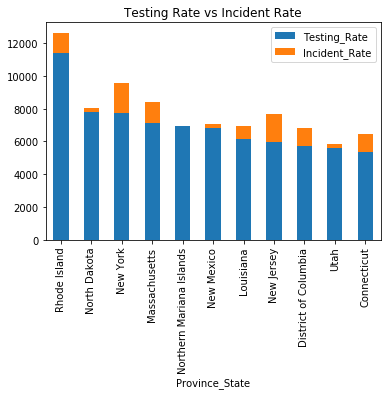

In [16]:
plt.figure(figsize=(25,25))
df_new = df[['Province_State','Testing_Rate','Incident_Rate']].sort_values('Testing_Rate',ascending=False)
df_new[:11].plot(x='Province_State',kind='bar',stacked=True)
plt.title("Testing Rate vs Incident Rate")

Text(0.5, 1.0, 'Hospitalization Rate Vs Mortality Rate')

<Figure size 1800x1800 with 0 Axes>

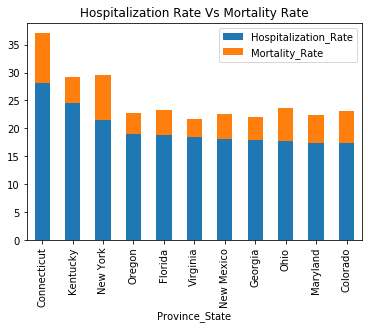

In [17]:

plt.figure(figsize=(25,25))
df_new = df[['Province_State','Hospitalization_Rate','Mortality_Rate']].sort_values('Hospitalization_Rate',ascending=False)
df_new[:11].plot(x='Province_State',kind='bar',stacked=True)
plt.title("Hospitalization Rate Vs Mortality Rate")

Text(0.5, 1.0, 'Confirmed vs Deaths')

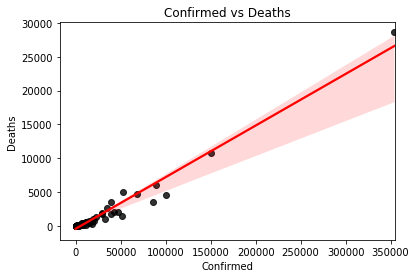

In [18]:
sns.regplot('Confirmed','Deaths',data=df,scatter_kws={"color": "Black"}, line_kws={"color": "Red"})
plt.title("Confirmed vs Deaths")

    Observe that outliers are present and also that both variable are positively correlated to each other.

Text(0.5, 1.0, 'Confirmed Vs Recovered Cases')

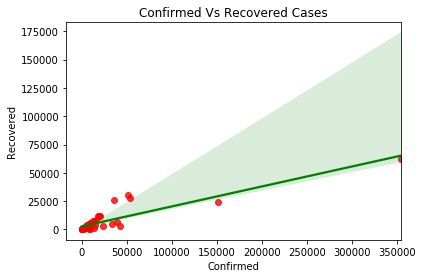

In [19]:
sns.regplot(df['Confirmed'],df['Recovered'],scatter_kws={"color": "Red"}, line_kws={"color": "Green"})
plt.title('Confirmed Vs Recovered Cases')

Text(0.5, 1.0, 'Recovered vs Active Cases')

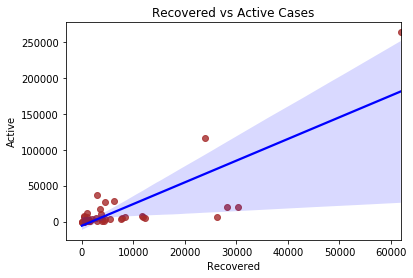

In [20]:
sns.regplot('Recovered','Active',data=df,scatter_kws={"color": "Brown"}, line_kws={"color": "Blue"})
plt.title("Recovered vs Active Cases")

In [21]:
#To plot a geographical map we need to install geopandas
#!pip install descartes
#!pip install geopandas
#import descartes
import geopandas as gpd
from shapely.geometry import Point,Polygon

In [22]:
new_df=df.copy()
new_df

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


In [23]:
geometry = [Point(xy) for xy in zip(new_df['Long_'],new_df['Lat'])]
crs = {'init':'epsg:4326'}
geo_df = gpd.GeoDataFrame(new_df,
                         crs=crs,
                         geometry=geometry
                         )
street_map = gpd.read_file('cb_2018_us_state_500k.shp')

Text(0.5, 1, 'Representation of COVID-19 Cases and it status in USA')

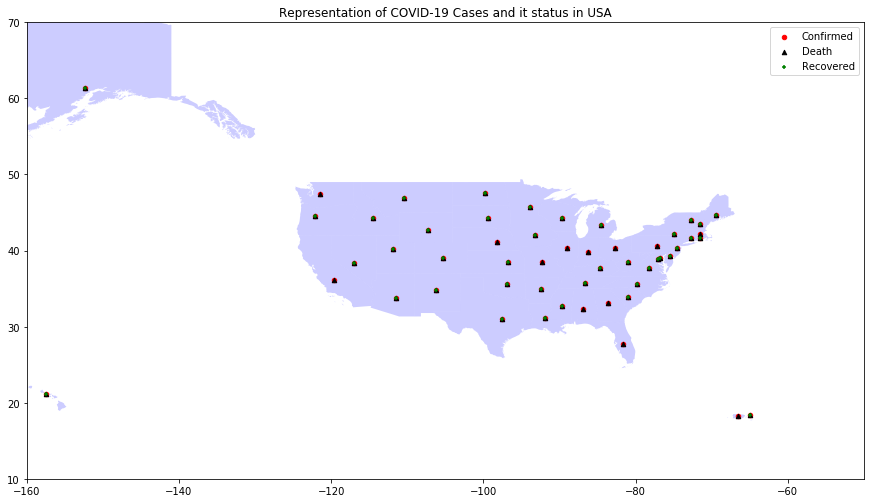

In [24]:
from geopandas import GeoDataFrame as gdf
fig,ax=plt.subplots(figsize=(15,15))
street_map.plot(ax=ax,alpha=0.2,color='blue',zorder=1)
geo_df[geo_df['Confirmed']>0].plot(ax=ax,markersize=20,color='Red',marker='o',label='Confirmed')
geo_df[geo_df['Deaths']>0].plot(ax=ax,markersize=20,color='Black',marker='^',label='Death')
geo_df[geo_df['Recovered']>0].plot(ax=ax,markersize=20,color='Green',marker='+',label='Recovered')
ax.set_ylim(auto=True)
plt.legend(prop={"size":10})

#minx, miny, maxx, maxy = gdf.total_bounds
ax.set_xlim(-160, -50)
ax.set_ylim(10, 70)

plt.title("Representation of COVID-19 Cases and it status in USA")

In [25]:
drop_col = ['Lat','Long_','Province_State','Country_Region','Last_Update','UID','Hospitalization_Rate']

for i in range(len(drop_col)):
    df.drop(drop_col[i],axis=1,inplace=True)

In [26]:
df[df['Incident_Rate'].isnull()]

,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate
9,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,USA,NaN
13,103,3,NaN,100.0,99999,NaN,NaN,NaN,2.912621,USA,NaN


In [27]:
df.drop(13,axis=0,inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 57
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Confirmed            57 non-null     int64  
 1   Deaths               57 non-null     int64  
 2   Recovered            42 non-null     float64
 3   Active               57 non-null     float64
 4   FIPS                 57 non-null     int64  
 5   Incident_Rate        56 non-null     float64
 6   People_Tested        56 non-null     float64
 7   People_Hospitalized  33 non-null     float64
 8   Mortality_Rate       56 non-null     float64
 9   ISO3                 57 non-null     object 
 10  Testing_Rate         56 non-null     float64
dtypes: float64(7), int64(3), object(1)
memory usage: 5.3+ KB


In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['ISO3'] = le.fit_transform(df['ISO3'])

In [30]:
df = df[[c for c in df if c not in ['Mortality_Rate','Testing_Rate','Confirmed','Active','Incident_Rate',
                                    'People_Tested','People_Hospitalized','Deaths','Recovered']] + ['Mortality_Rate','Testing_Rate','Confirmed','Active','Incident_Rate',
                                    'People_Tested','People_Hospitalized','Deaths','Recovered']]

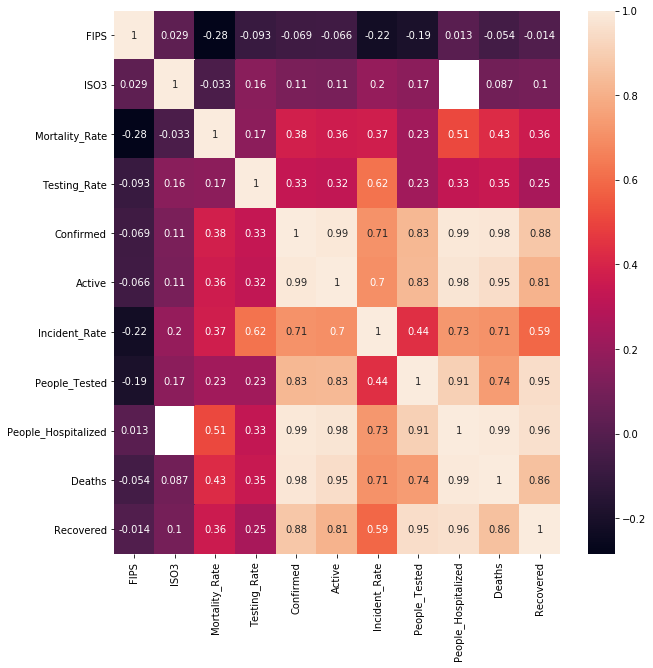

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

    Confirmed, Active, Incident_Rate,People_tested,People_Hospitalized, Deaths and Recovered columns are highly positively 
    correlated to each other.

In [32]:
df[df['People_Hospitalized'].isnull()]
#We cannot replace NaN values with mean or median as it will vary and is dependent on Confirmed cases. hence we will replace with 0.

,FIPS,ISO3,Mortality_Rate,Testing_Rate,Confirmed,Active,Incident_Rate,People_Tested,People_Hospitalized,Deaths,Recovered
1,2,4,2.493766,5063.940017,401,39.0,54.815493,37045.0,NaN,10,352.0
2,60,0,NaN,222.857246,0,0.0,0.000000,124.0,NaN,0,NaN
5,6,4,4.066421,3492.893832,85997,82500.0,217.646575,1380120.0,NaN,3497,NaN
8,10,4,3.783256,4663.552976,8194,3919.0,841.476990,45412.0,NaN,310,3965.0
9,88888,4,0.000000,NaN,49,49.0,NaN,NaN,NaN,0,NaN
10,11,4,5.390015,5727.106946,7551,6085.0,1069.927127,40419.0,NaN,407,1059.0
14,66,1,3.246753,3027.479921,154,24.0,93.771502,4972.0,NaN,5,125.0
17,17,4,4.506164,5071.986102,100418,95893.0,792.451219,642713.0,NaN,4525,NaN
19,19,4,2.516005,3510.159838,15620,6865.0,495.076179,110748.0,NaN,393,8362.0
22,22,4,7.384755,6151.487891,35316,6459.0,759.680898,285970.0,NaN,2608,26249.0


In [33]:
df['People_Hospitalized'].replace(np.NaN,0,inplace=True)

In [34]:
df.head()

,FIPS,ISO3,Mortality_Rate,Testing_Rate,Confirmed,Active,Incident_Rate,People_Tested,People_Hospitalized,Deaths,Recovered
0,1,4,3.999387,3353.942386,13052,12530.0,266.194321,164450.0,1493.0,522,NaN
1,2,4,2.493766,5063.940017,401,39.0,54.815493,37045.0,0.0,10,352.0
2,60,0,NaN,222.857246,0,0.0,0.000000,124.0,0.0,0,NaN
3,4,4,5.011405,2272.859351,14906,10386.0,204.788838,165435.0,1792.0,747,3773.0
4,5,4,2.138717,3189.670370,5003,1044.0,165.782801,96258.0,535.0,107,3852.0


In [35]:
#index 2 has no vital information, hence we will delete that row as well.
df.drop(2,axis=0,inplace=True)


In [36]:
df[df['Incident_Rate'].isnull()]

,FIPS,ISO3,Mortality_Rate,Testing_Rate,Confirmed,Active,Incident_Rate,People_Tested,People_Hospitalized,Deaths,Recovered
9,88888,4,0.0,NaN,49,49.0,NaN,NaN,0.0,0,NaN


In [37]:
#We can delete this row as well.
df.drop(9,axis=0,inplace=True)

In [38]:
df_correlated_cols = df[['Confirmed','Active','Incident_Rate','People_Tested','People_Hospitalized','Deaths','Recovered']] 

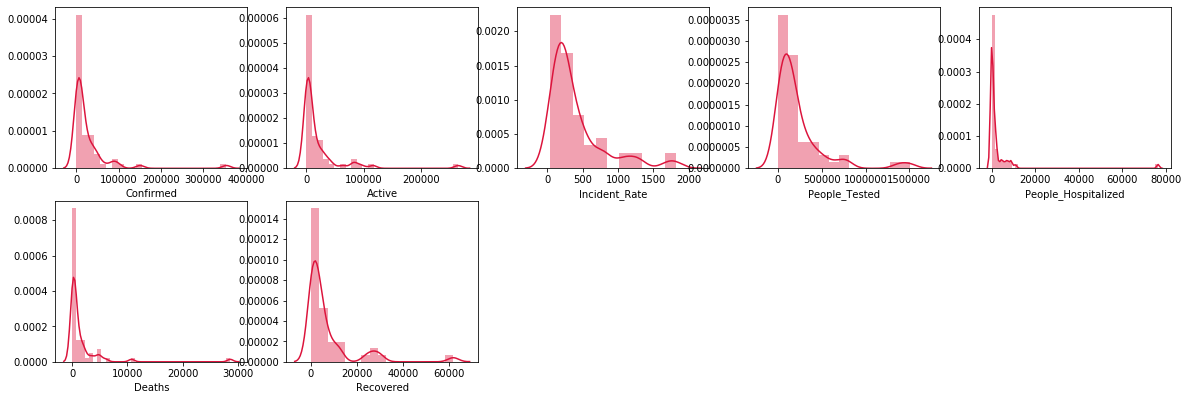

In [39]:
#Check for skewness
col = df_correlated_cols.columns.values
plt.figure(figsize=(20,35))
for i in range(0,len(col)):
    plt.subplot(10,5,i+1)
    sns.distplot(df_correlated_cols[col[i]],color='crimson')
plt.show()

    Right Skewness can be seen in columns - Çonfirmed,Deaths,Active,Incident_Rate,People_Tested,People_Hospitalized,
    Recovered.

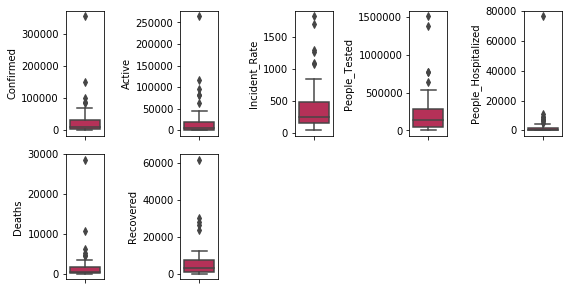

In [40]:
#Check for outliers :
plt.figure(figsize=(8,20))
for i in range(0,len(col)):
    plt.subplot(10,5,i+1)
    sns.boxplot(df_correlated_cols[col[i]],palette='rocket',orient='v')
    plt.tight_layout()

    There are outliers present in almost all the columns.

In [41]:
#Use z-score to find outliers :
from scipy.stats import zscore
#data.info()
z=np.abs(zscore(df))
print(np.where(z>3))

(array([ 4, 11, 31, 33, 33, 33, 33, 33, 33, 36, 42], dtype=int64), array([7, 1, 6, 4, 5, 6, 7, 8, 9, 1, 3], dtype=int64))


In [42]:
#remove the outliers.
df_new = df[(z<3).all(axis=1)]

In [43]:
print(df.shape,"\t",df_new.shape)

(55, 11) 	 (0, 11)


In [44]:
#Check for skewness for both independent variables.
df.skew()

FIPS                   0.370416
ISO3                  -4.260285
Mortality_Rate         0.591921
Testing_Rate           1.452496
Confirmed              4.614978
Active                 4.083998
Incident_Rate          1.955029
People_Tested          2.769517
People_Hospitalized    6.713289
Deaths                 5.361075
Recovered              3.136333
dtype: float64

In [45]:
#To remove skewness :
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer('yeo-johnson')
df = pd.DataFrame(pt.fit_transform(df))


In [46]:
df.skew()

0    -0.136357
1     1.203851
2    -0.014373
3     0.260664
4    -0.001575
5    -0.060706
6     0.000991
7     0.009090
8    -0.044856
9    -0.015290
10   -0.002784
dtype: float64

Conclusions :
    1. Through this dataset, we can not give the entire story of covid-19, but we come to know the status of cases in the   
    United States of America.
    2. With the dataset provided, we can analyse how many tests were performed, how many people were confirmed, how many 
    were hospitalised, how many cases are still active, how many people have recovered and how many people have lost their 
    life to this deadly disease.
    3. Predictive analysis on this dataset, with target variables as Deaths or Recovered, lead to extremely high errors. 
    Hence did not deploy any model.